In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

import pickle

import warnings
warnings.filterwarnings('ignore')
print("Libraries imported")

Libraries imported


In [3]:
df0=pd.read_csv("C:\\Users\\vikas\\Desktop\\fliprobo\\Flight_Price_Prediction\\flightdata.csv")
print(" Dataset imported")

 Dataset imported


## Dataset

In [4]:
df0

,Unnamed: 0,Unnamed: 0.1,Airline name,From,To,Arival time,Depart time,Stoppage,Duration,Price
0,0,0,Air India,New Delhi,Mumbai,23:35,21:20,Non Stop,2h 15m,"5,317"
1,1,1,Air India,New Delhi,Mumbai,00:45\n+ 1 day,22:30,Non Stop,2h 15m,"5,317"
2,2,2,Go First,New Delhi,Mumbai,22:05,20:00,Non Stop,2h 05m,"5,899"
3,3,3,Go First,New Delhi,Mumbai,23:15,21:00,Non Stop,2h 15m,"5,899"
4,4,4,IndiGo,New Delhi,Mumbai,01:20\n+ 1 day,23:00,Non Stop,2h 20m,"5,899"
...,...,...,...,...,...,...,...,...,...,...
2481,98,98,Vistara,New Delhi,Kolkata,09:40\n+ 1 day,17:35,2 Stop(s),16h 05m,"37,770"
2482,99,99,Vistara,New Delhi,Kolkata,16:50,09:30,1 Stop,7h 20m,"38,474"
2483,100,100,Vistara,New Delhi,Kolkata,19:50,09:30,1 Stop,10h 20m,"38,474"
2484,101,101,Air India,New Delhi,Kolkata,23:00,14:00,1 Stop,9h 00m,"39,734"


## renaming columns name 

In [6]:
df0.rename(columns={'Arival time': 'Arival_time', 'Depart time': 'Depart_time', 'Stoppage': 'Stops', 'Airline name': 'Airline_name'},inplace=True)

## Checking All Column Name

In [17]:
df0.columns


Index(['Airline_name', 'From', 'To', 'Arival_time', 'Depart_time', 'Stops',
       'Duration', 'Price'],
      dtype='object')

## Checking Total Numbers of Rows and Column

In [7]:
df0.shape

(2486, 10)

## Information about Data (Memory Used and Data Types)

In [8]:
df0.info()
## .info() gives all the details of each features like-datatype, number of rows and columns, null values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2486 entries, 0 to 2485
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2486 non-null   int64 
 1   Unnamed: 0.1  2486 non-null   int64 
 2   Airline_name  2486 non-null   object
 3   From          2486 non-null   object
 4   To            2486 non-null   object
 5   Arival_time   2486 non-null   object
 6   Depart_time   2486 non-null   object
 7   Stops         2486 non-null   object
 8   Duration      2486 non-null   object
 9   Price         2486 non-null   object
dtypes: int64(2), object(8)
memory usage: 194.3+ KB


## Checking for Null Values

In [9]:
# let's check null values 
df0.isnull().sum()

Unnamed: 0      0
Unnamed: 0.1    0
Airline_name    0
From            0
To              0
Arival_time     0
Depart_time     0
Stops           0
Duration        0
Price           0
dtype: int64

## Checking for Null Values through heatmap

<AxesSubplot:>

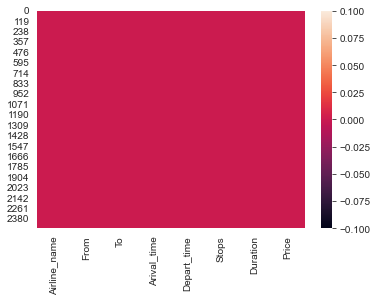

In [18]:
sns.heatmap(df0.isnull())


## dropping the unnecessary columns

In [10]:
df0=df0.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [11]:
df1=df0.copy()

In [12]:
# Shape of dataset
print('Rows: {} Columns: {}'.format(df1.shape[0], df0.shape[1]))

Rows: 2486 Columns: 8


## Checking Data Type of All Data

In [13]:
#checking shape & datatypes of the columns in data...
print(df1.shape)
print(' ')
print(df1.dtypes)

(2486, 8)
 
Airline_name    object
From            object
To              object
Arival_time     object
Depart_time     object
Stops           object
Duration        object
Price           object
dtype: object


## Information about Data (Memory Used and Data Types)

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2486 entries, 0 to 2485
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline_name  2486 non-null   object
 1   From          2486 non-null   object
 2   To            2486 non-null   object
 3   Arival_time   2486 non-null   object
 4   Depart_time   2486 non-null   object
 5   Stops         2486 non-null   object
 6   Duration      2486 non-null   object
 7   Price         2486 non-null   object
dtypes: object(8)
memory usage: 155.5+ KB


In [15]:
# % of missing values
df1.isnull().sum()*100/df1.shape[0]

Airline_name    0.0
From            0.0
To              0.0
Arival_time     0.0
Depart_time     0.0
Stops           0.0
Duration        0.0
Price           0.0
dtype: float64

## checking for duplicates 

In [16]:
df1.duplicated().sum()

115

## Checking total number of unique value in each column of Dataset

In [20]:
df1.nunique()


Airline_name       7
From               5
To                 5
Arival_time      368
Depart_time      231
Stops              3
Duration         338
Price           1416
dtype: int64

In [21]:
df1


,Airline_name,From,To,Arival_time,Depart_time,Stops,Duration,Price
0,Air India,New Delhi,Mumbai,23:35,21:20,Non Stop,2h 15m,"5,317"
1,Air India,New Delhi,Mumbai,00:45\n+ 1 day,22:30,Non Stop,2h 15m,"5,317"
2,Go First,New Delhi,Mumbai,22:05,20:00,Non Stop,2h 05m,"5,899"
3,Go First,New Delhi,Mumbai,23:15,21:00,Non Stop,2h 15m,"5,899"
4,IndiGo,New Delhi,Mumbai,01:20\n+ 1 day,23:00,Non Stop,2h 20m,"5,899"
...,...,...,...,...,...,...,...,...
2481,Vistara,New Delhi,Kolkata,09:40\n+ 1 day,17:35,2 Stop(s),16h 05m,"37,770"
2482,Vistara,New Delhi,Kolkata,16:50,09:30,1 Stop,7h 20m,"38,474"
2483,Vistara,New Delhi,Kolkata,19:50,09:30,1 Stop,10h 20m,"38,474"
2484,Air India,New Delhi,Kolkata,23:00,14:00,1 Stop,9h 00m,"39,734"


## Data Cleaning


In [22]:
df1['Price'] = df1['Price'].str.replace(',','').astype(int)

In [23]:
# Depart time is when a plane leaves the gate. 

# Extracting Hours
df1["Depart hour"] = pd.to_datetime(df1["Depart_time"]).dt.hour

# Extracting Minutes
df1["Depart min"] = pd.to_datetime(df1["Depart_time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df1.drop(["Depart_time"], axis = 1, inplace = True)

In [24]:
df1.head()

,Airline_name,From,To,Arival_time,Stops,Duration,Price,Depart hour,Depart min
0,Air India,New Delhi,Mumbai,23:35,Non Stop,2h 15m,5317,21,20
1,Air India,New Delhi,Mumbai,00:45\n+ 1 day,Non Stop,2h 15m,5317,22,30
2,Go First,New Delhi,Mumbai,22:05,Non Stop,2h 05m,5899,20,0
3,Go First,New Delhi,Mumbai,23:15,Non Stop,2h 15m,5899,21,0
4,IndiGo,New Delhi,Mumbai,01:20\n+ 1 day,Non Stop,2h 20m,5899,23,0


In [25]:
# Assigning and converting Duration column into list
duration = list(df1["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [26]:
# Adding duration_hours and duration_mins list to train_data dataframe

df1["Duration_hours"] = duration_hours
df1["Duration_mins"] = duration_mins
df1.drop(["Duration"], axis = 1, inplace = True)

In [27]:
df1.head()

,Airline_name,From,To,Arival_time,Stops,Price,Depart hour,Depart min,Duration_hours,Duration_mins
0,Air India,New Delhi,Mumbai,23:35,Non Stop,5317,21,20,2,15
1,Air India,New Delhi,Mumbai,00:45\n+ 1 day,Non Stop,5317,22,30,2,15
2,Go First,New Delhi,Mumbai,22:05,Non Stop,5899,20,0,2,5
3,Go First,New Delhi,Mumbai,23:15,Non Stop,5899,21,0,2,15
4,IndiGo,New Delhi,Mumbai,01:20\n+ 1 day,Non Stop,5899,23,0,2,20


In [28]:
# check categorical data 
for col in df1:
    print(col , "\n" , df1[col].unique() , "\n")

Airline_name 
 ['Air India' 'Go First' 'IndiGo' 'Air Asia' 'SpiceJet' 'Vistara'
 'Alliance Air'] 

From 
 ['New Delhi' 'Mumbai' 'Goa' 'Bangalore' 'Kolkata'] 

To 
 ['Mumbai' 'New Delhi' 'Goa' 'Bangalore' 'Kolkata'] 

Arival_time 
 ['23:35' '00:45\n+ 1 day' '22:05' '23:15' '01:20\n+ 1 day' '22:10'
 '00:40\n+ 1 day' '20:05' '07:25\n+ 1 day' '21:30' '18:00' '18:40' '19:40'
 '22:35' '00:00\n+ 1 day' '19:55' '22:00' '20:15' '21:25' '20:10' '23:40'
 '19:05' '16:45' '17:35' '08:10\n+ 1 day' '16:50\n+ 1 day'
 '00:20\n+ 2 days' '06:05\n+ 1 day' '08:00\n+ 1 day' '08:20\n+ 1 day'
 '07:55\n+ 1 day' '11:15\n+ 1 day' '10:15\n+ 1 day' '08:35\n+ 1 day'
 '16:25\n+ 1 day' '13:05\n+ 1 day' '00:15\n+ 1 day' '23:10'
 '11:25\n+ 1 day' '09:40\n+ 1 day' '23:00' '14:45\n+ 1 day'
 '10:30\n+ 1 day' '11:30\n+ 1 day' '10:00\n+ 1 day' '21:15'
 '06:15\n+ 1 day' '18:45\n+ 1 day' '13:00\n+ 1 day' '22:30'
 '20:20\n+ 1 day' '23:30' '23:20' '20:15\n+ 1 day' '08:15\n+ 1 day'
 '11:05\n+ 1 day' '17:20\n+ 1 day' '21:40' '16:

## EXPLORATORY DATA ANALYSIS (EDA)

In [29]:
catg_features=[col for col in df1.columns if df1[col].dtypes=='object']
cont_features=[col for col in df1.columns if df1[col].dtypes!='object']

In [30]:
print(f'Number of Categorical features: {len(catg_features)}')
print(f'Number of Continuous features: {len(cont_features)}')

Number of Categorical features: 5
Number of Continuous features: 5


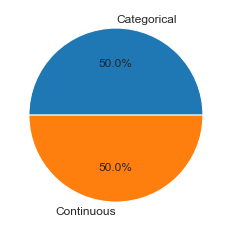

In [31]:
plt.pie([len(catg_features),len(cont_features)],labels=['Categorical','Continuous'],textprops={'fontsize':12},autopct='%1.1f%%')
plt.show()

In [32]:
categorical_columns = ['Airline_name','From','To','Stops']

In [34]:
l = list(df1.columns)
continous_columns=[]
for i in l:
    if(i not in categorical_columns):
        continous_columns.append(i)

In [35]:
print(continous_columns)

['Arival_time', 'Price', 'Depart hour', 'Depart min', 'Duration_hours', 'Duration_mins']


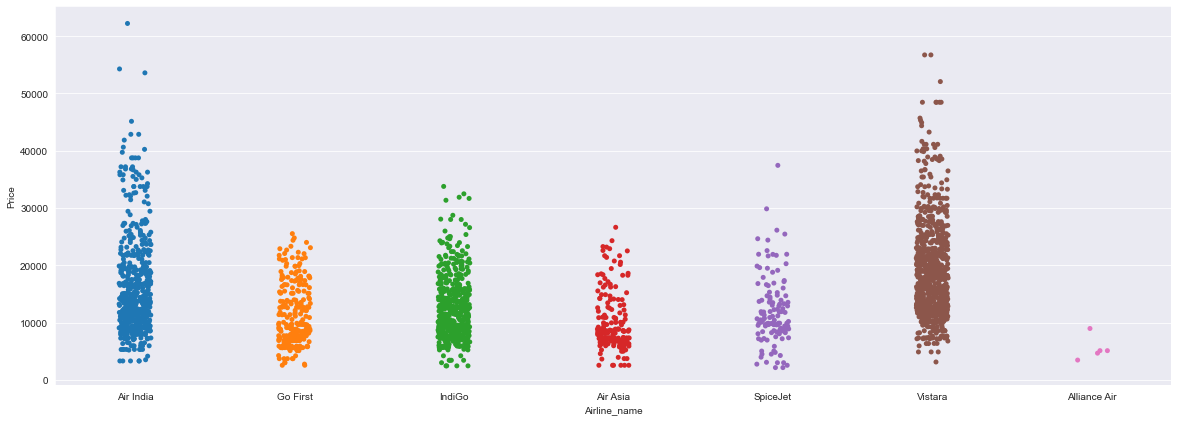

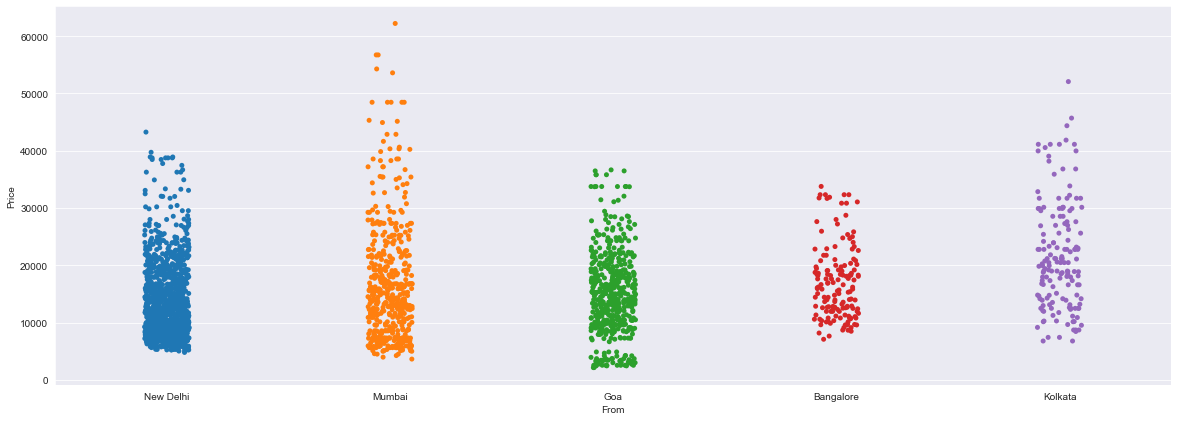

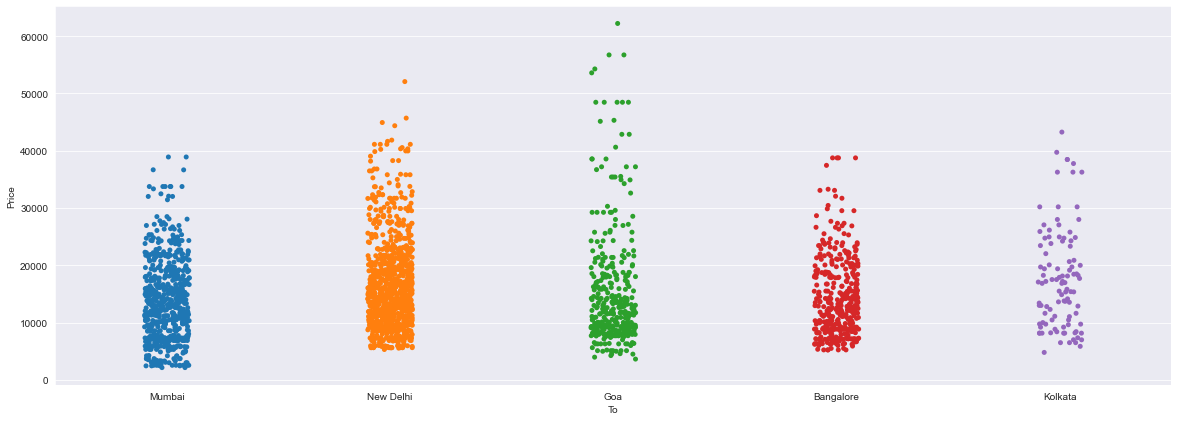

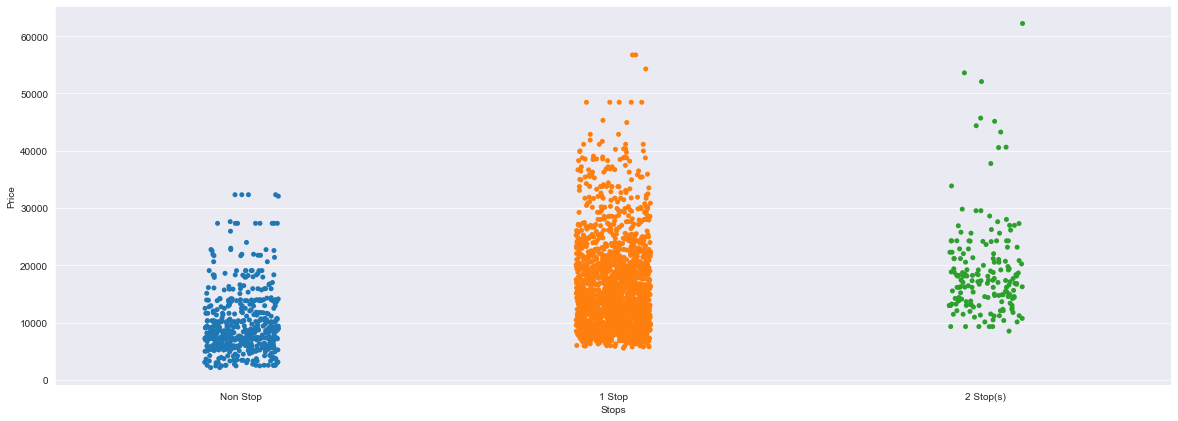

In [37]:
counter=1;

for column in categorical_columns:
        plt.figure(figsize=(20,500))
        plt.subplot(60,1,counter)
        counter=counter+1
        sns.stripplot(x=column, y="Price", data=df1)
        plt.show()

In [38]:
# From
val=df1.From.value_counts().values
label = df1.From.value_counts().index

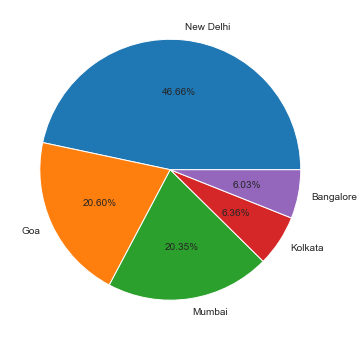

In [39]:
plt.figure(figsize=(7,6))
plt.pie(val[:10],labels=label[:10],autopct='%1.2f%%')
plt.show()

In [41]:
# To
val=df1.To.value_counts().values
label = df1.To.value_counts().index

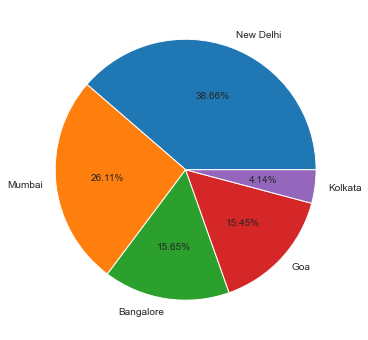

In [42]:
plt.figure(figsize=(7,6))
plt.pie(val[:10],labels=label[:10],autopct='%1.2f%%')
plt.show()

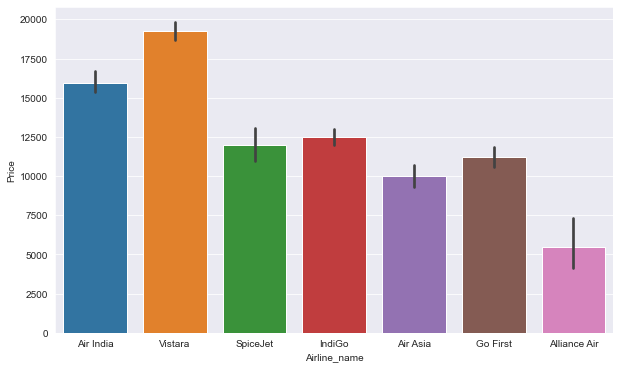

In [43]:
plt.figure(figsize=(10,6))
df_good = df1.sort_values(by="Price",ascending=False)
sns.barplot(x="Airline_name",y="Price",data=df_good)
plt.show()

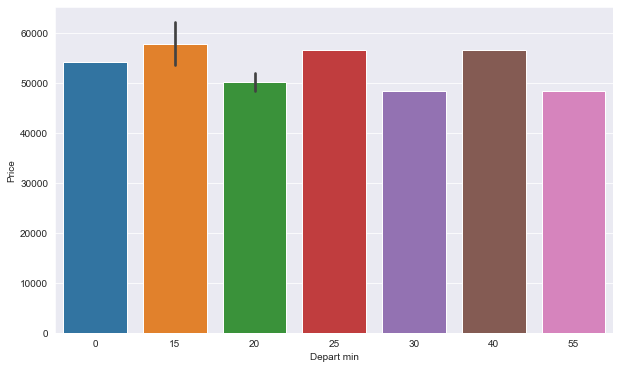

In [44]:
plt.figure(figsize=(10,6))
df_good = df1.sort_values(by="Price",ascending=False).iloc[0:10]
sns.barplot(x="Depart min",y="Price",data=df_good)
plt.show()

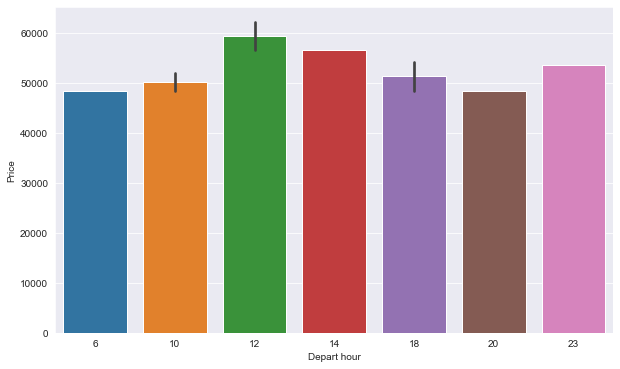

In [45]:
plt.figure(figsize=(10,6))
df_good = df1.sort_values(by="Price",ascending=False).iloc[0:10]
sns.barplot(x="Depart hour",y="Price",data=df_good)
plt.show()

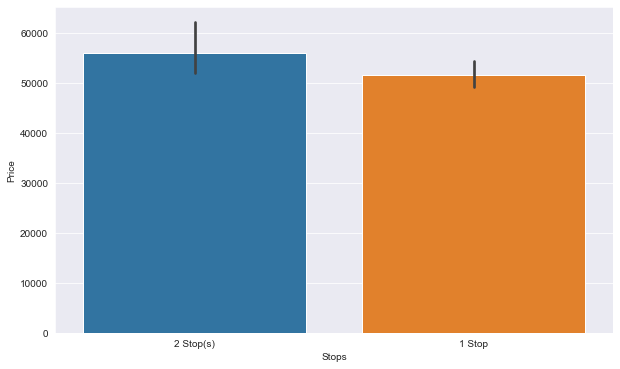

In [46]:
plt.figure(figsize=(10,6))
df_good = df1.sort_values(by="Price",ascending=False).iloc[0:10]
sns.barplot(x="Stops",y="Price",data=df_good)
plt.show()

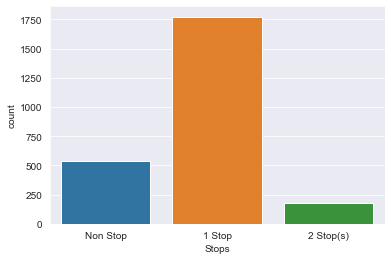

1 Stop       1773
Non Stop      537
2 Stop(s)     176
Name: Stops, dtype: int64

In [47]:
sns.countplot(x='Stops',data=df1)
plt.show()
df1['Stops'].value_counts()

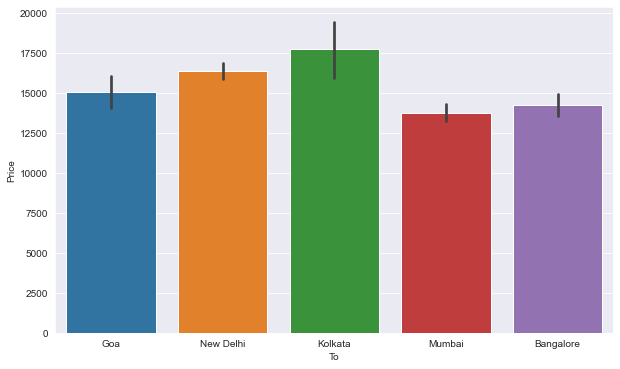

In [48]:
plt.figure(figsize=(10,6))
df_good = df1.sort_values(by="Price",ascending=False)
sns.barplot(x="To",y="Price",data=df_good)
plt.show()

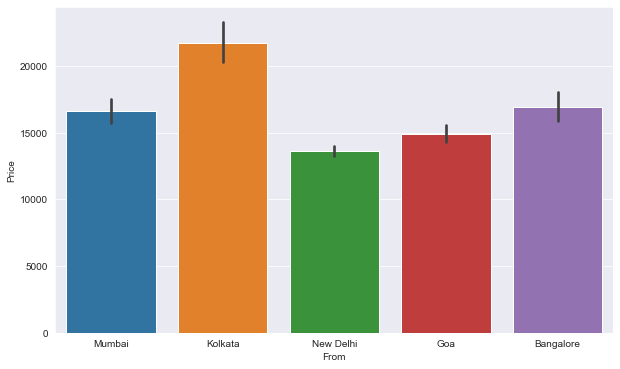

In [49]:
plt.figure(figsize=(10,6))
df_good = df1.sort_values(by="Price",ascending=False)
sns.barplot(x="From",y="Price",data=df_good)
plt.show()

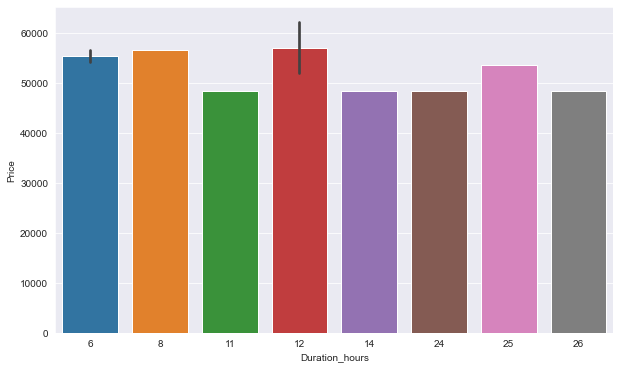

In [50]:
plt.figure(figsize=(10,6))
df_good = df1.sort_values(by="Price",ascending=False).iloc[0:10]
sns.barplot(x="Duration_hours",y="Price",data=df_good)
plt.show()

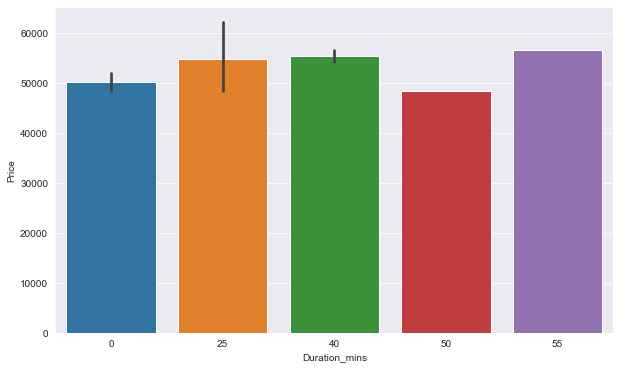

In [51]:
plt.figure(figsize=(10,6))
df_good = df1.sort_values(by="Price",ascending=False).iloc[0:10]
sns.barplot(x="Duration_mins",y="Price",data=df_good)
plt.show()

## Encoding

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
lab_enc=LabelEncoder()

In [55]:
df2 = lab_enc.fit_transform(df1['Arival_time'])
pd.Series(df2)

0       362
1        13
2       333
3       356
4        20
       ... 
2481    119
2482    232
2483    290
2484    351
2485    119
Length: 2486, dtype: int32

In [56]:
df1['Arival_time']=df2

In [57]:
df3 = lab_enc.fit_transform(df1['Stops'])
pd.Series(df3)
df1['Stops']=df3

In [58]:
df4 = lab_enc.fit_transform(df1['To'])
pd.Series(df4)
df1['To']=df4

In [59]:
df5 = lab_enc.fit_transform(df1['From'])
pd.Series(df5)
df1['From']=df5

In [60]:
df6 = lab_enc.fit_transform(df1['Airline_name'])
pd.Series(df6)
df1['Airline_name']=df6

In [61]:
df1.head()

,Airline_name,From,To,Arival_time,Stops,Price,Depart hour,Depart min,Duration_hours,Duration_mins
0,1,4,3,362,2,5317,21,20,2,15
1,1,4,3,13,2,5317,22,30,2,15
2,3,4,3,333,2,5899,20,0,2,5
3,3,4,3,356,2,5899,21,0,2,15
4,4,4,3,20,2,5899,23,0,2,20


In [62]:
df1.shape

(2486, 10)

# Checking Skewness using Distplot

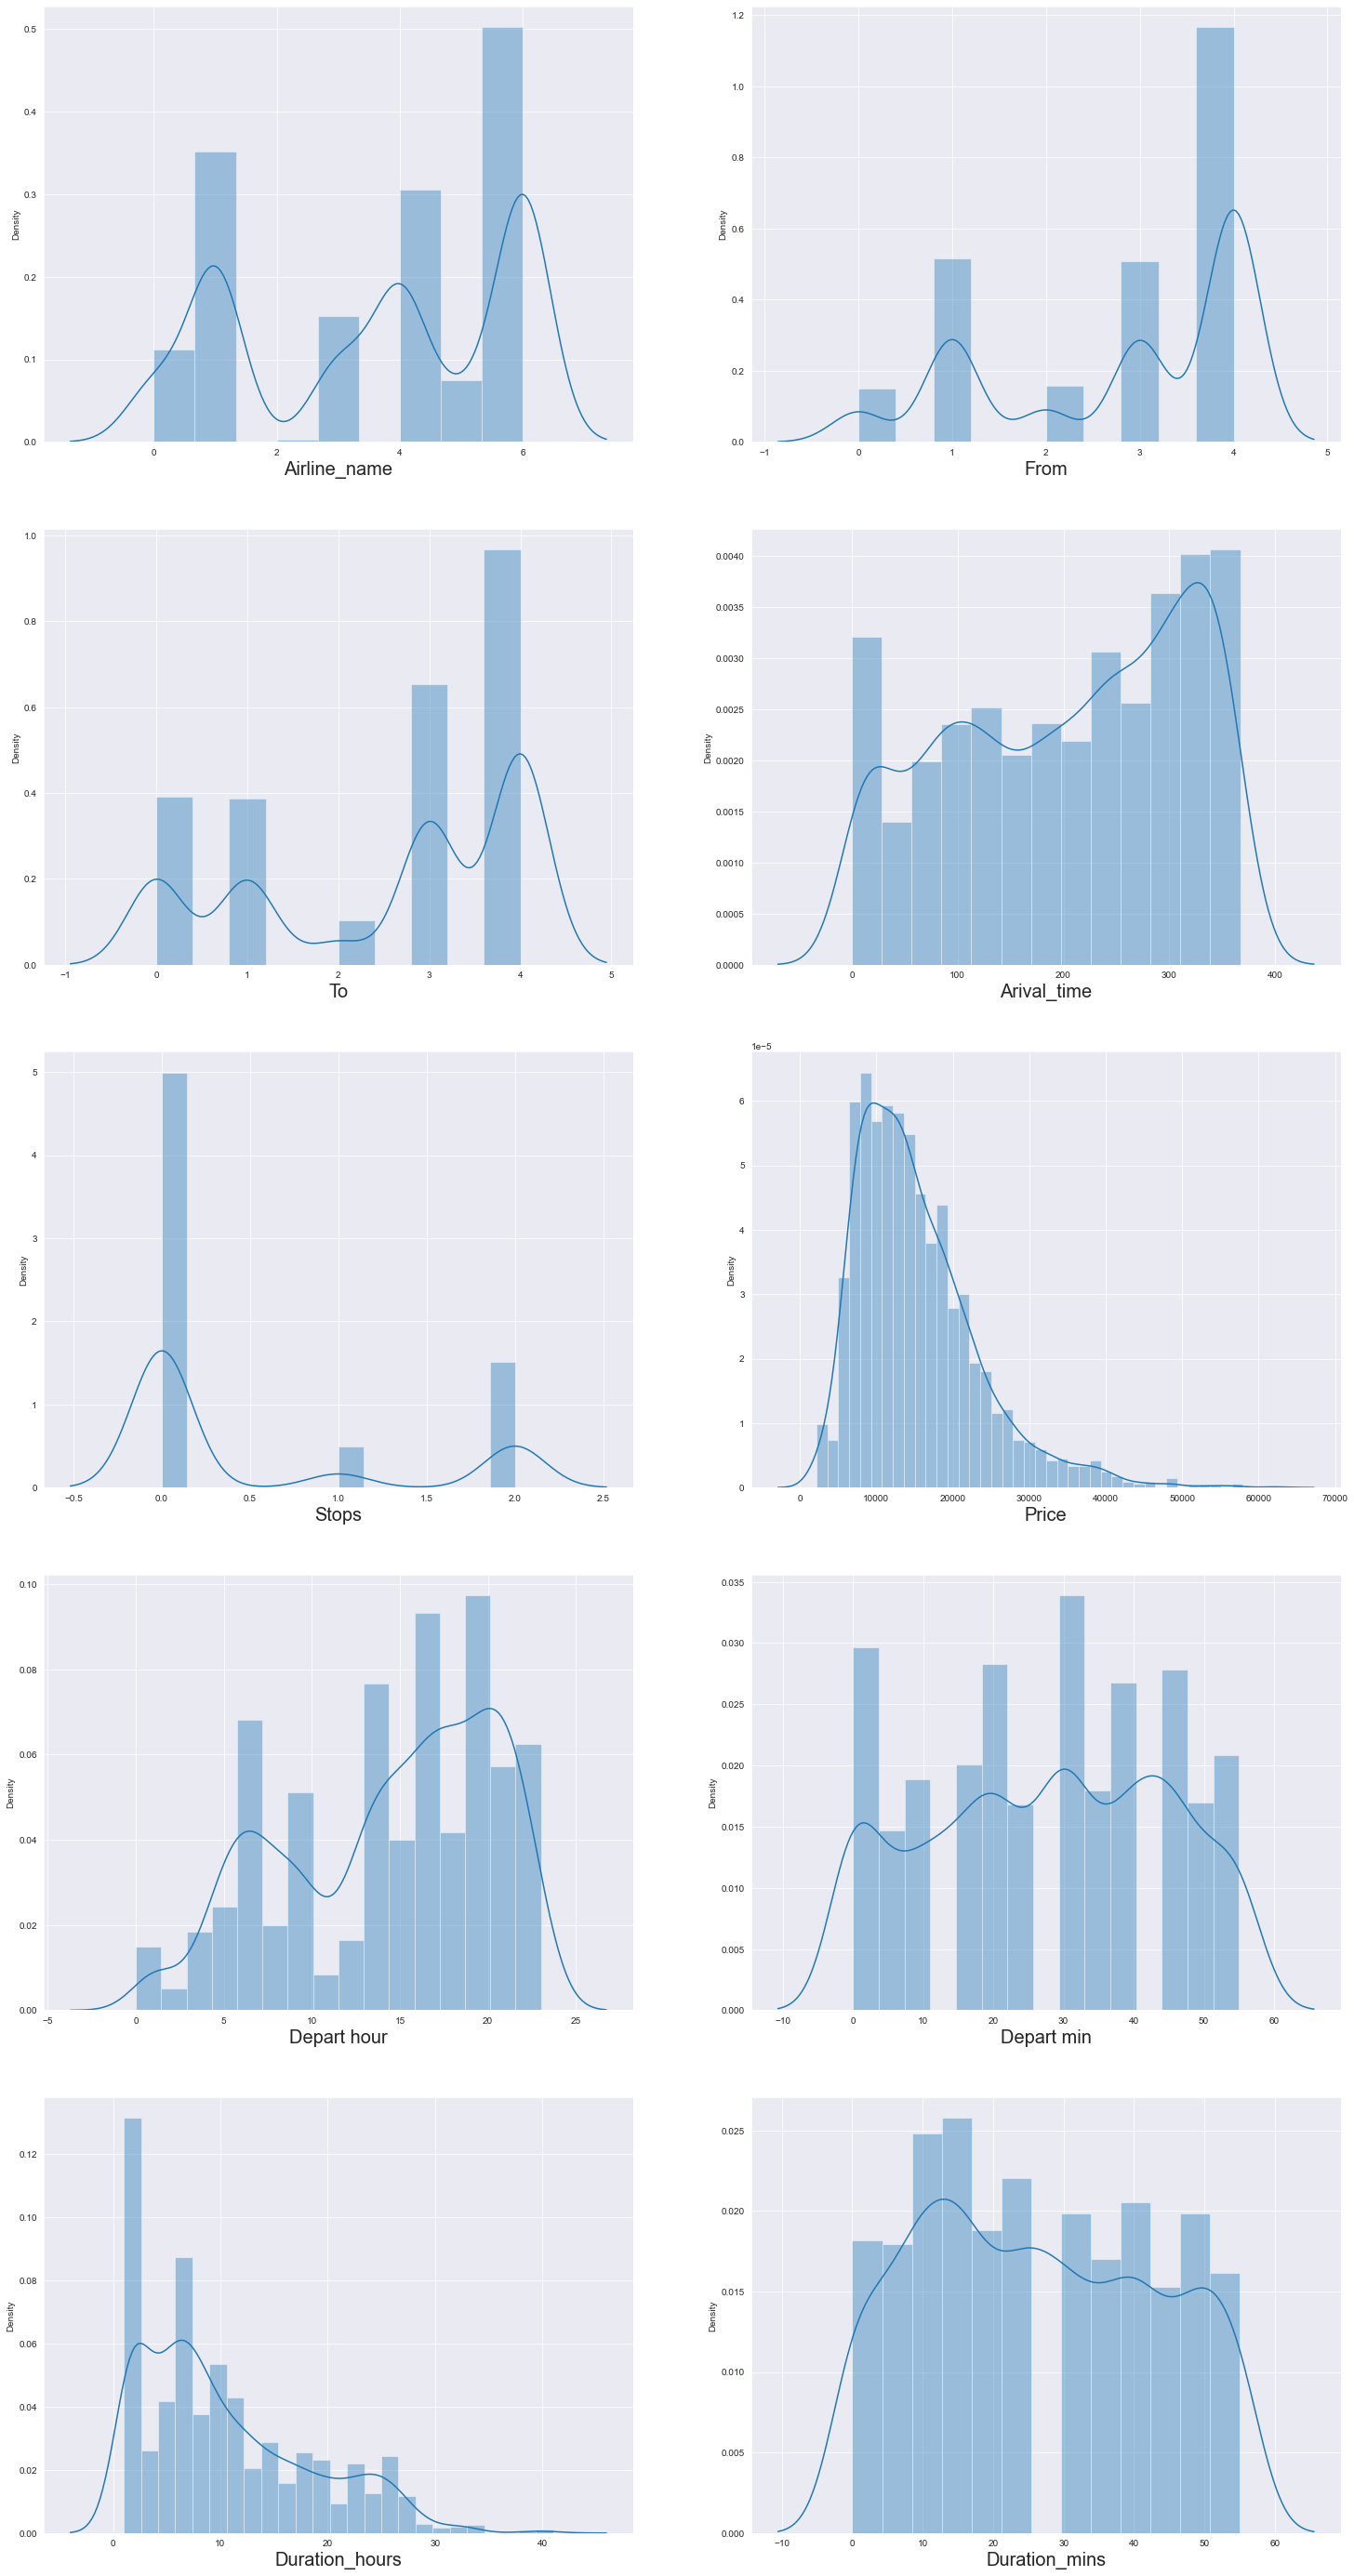

In [63]:
plt.figure(figsize=(25,50))
plotnumber=1

for column in df1:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Removing Skewness


In [64]:
from sklearn.preprocessing import power_transform

df1[['Duration_hours','Price','Depart hour']]=power_transform(df1[['Duration_hours','Price','Depart hour']])

# Check Outliers using boxplot

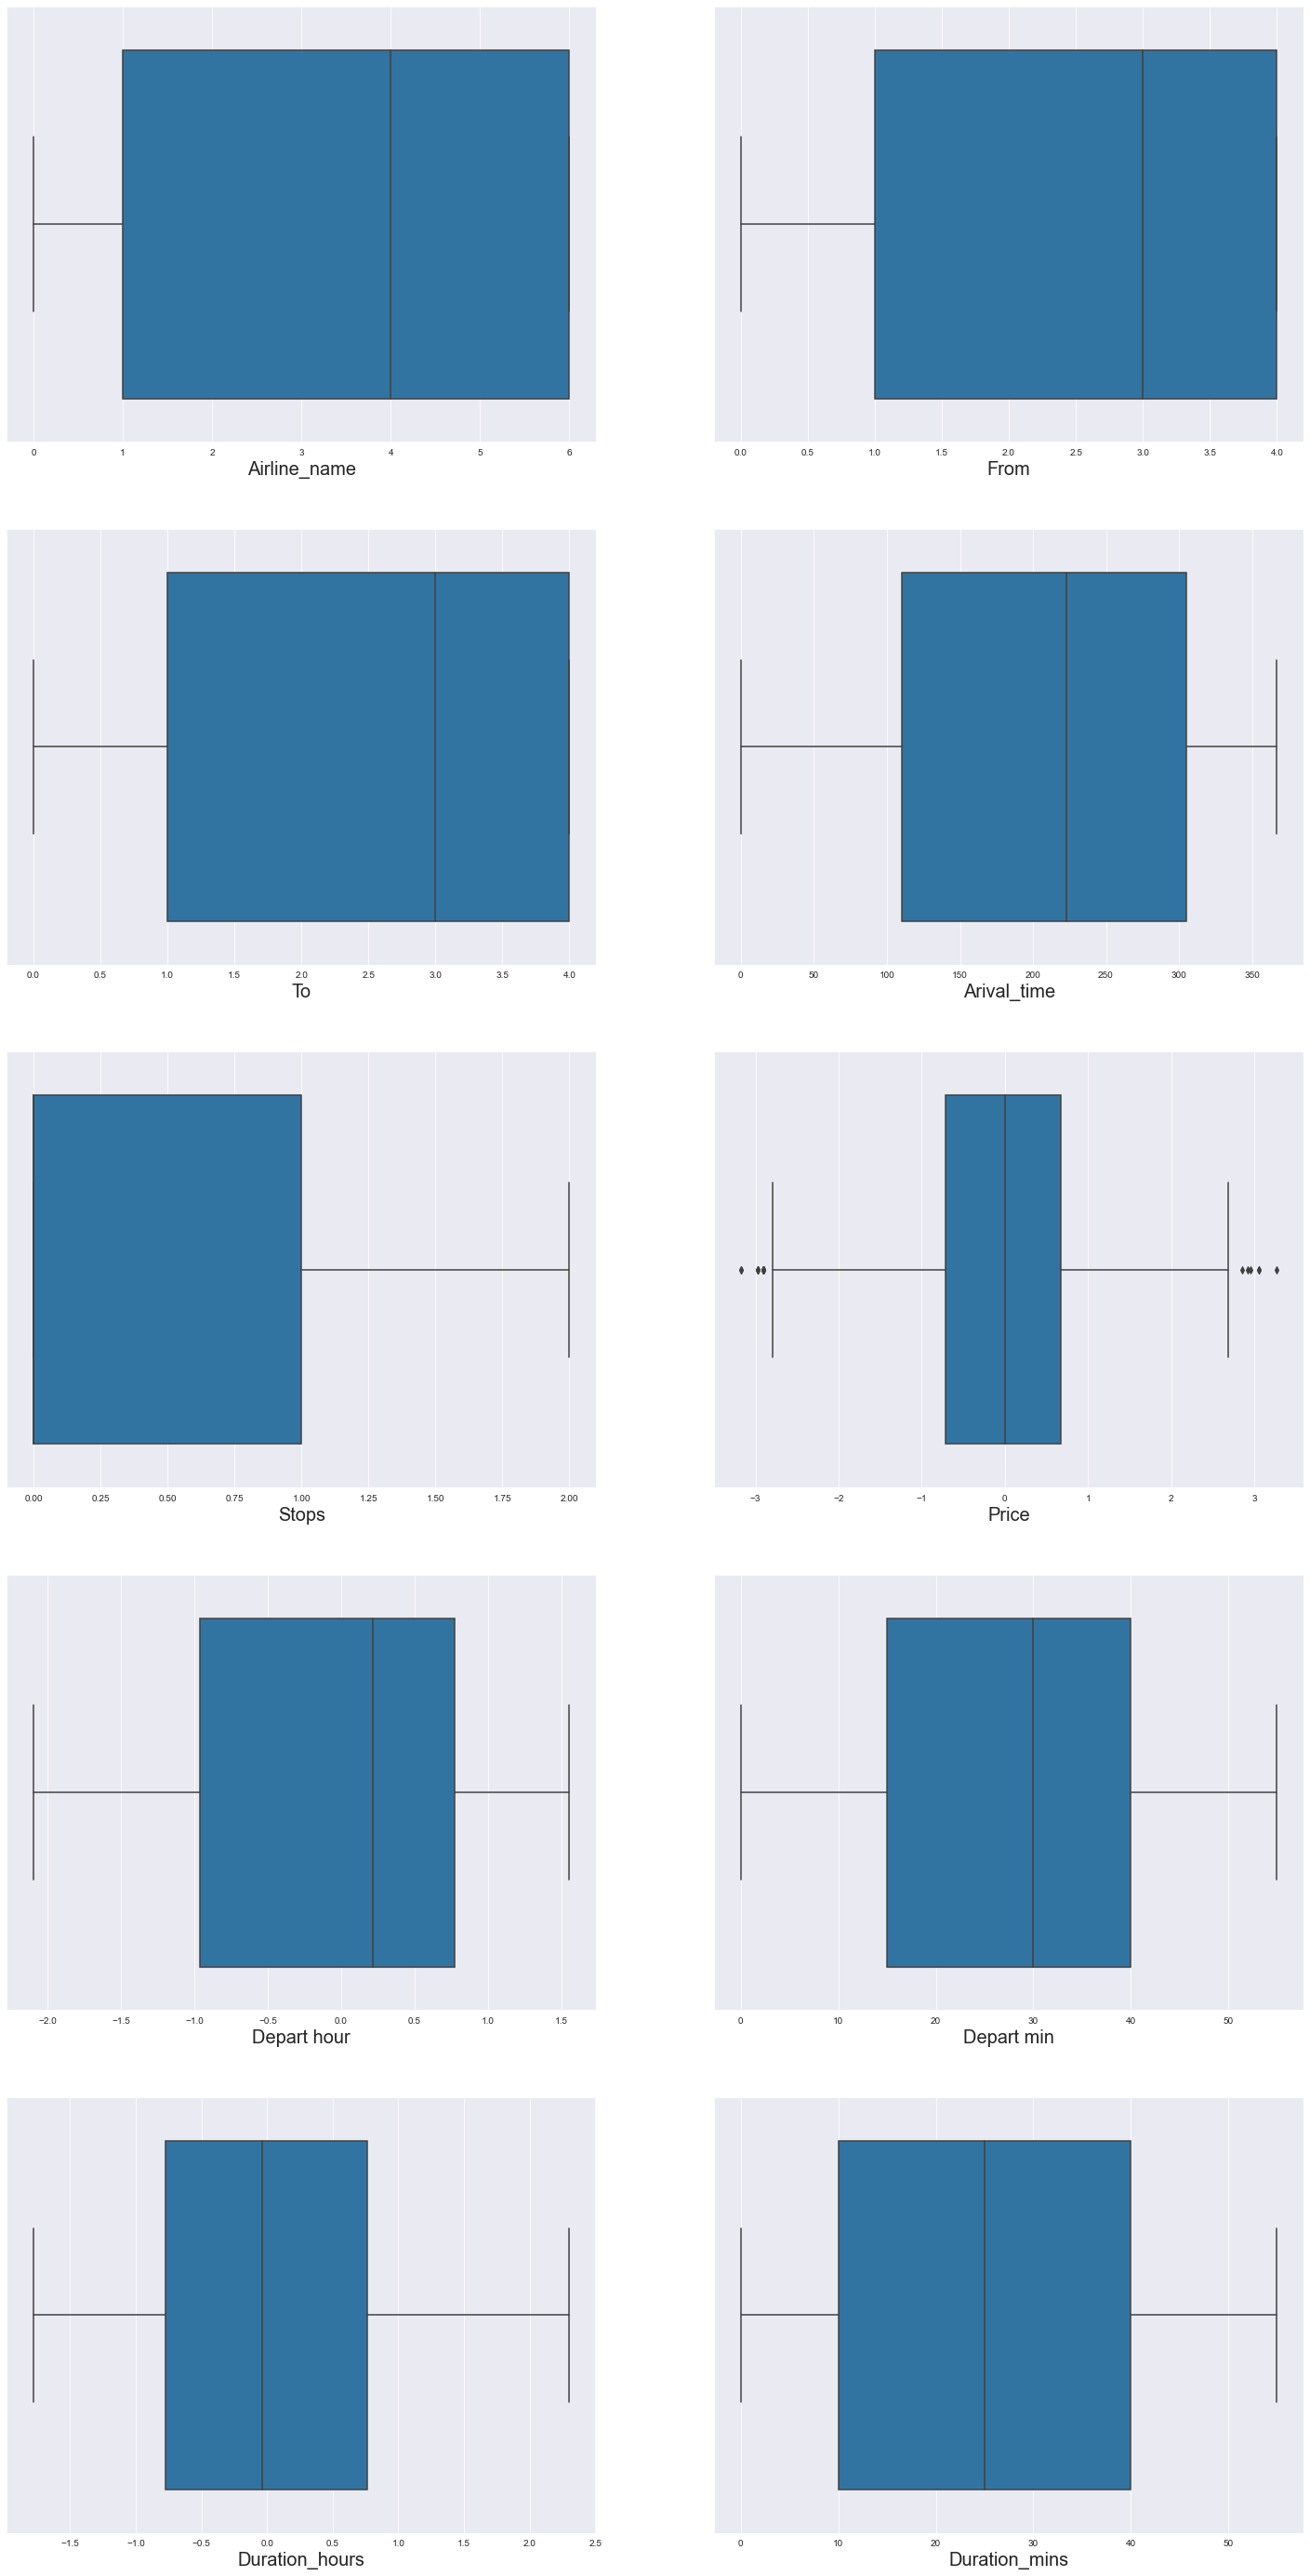

In [65]:
plt.figure(figsize=(25,50))
plotnumber=1
for column in df1:
    if plotnumber <=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.boxplot(df1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

In [66]:
outliers_columns = ['Price']

In [67]:
for i in outliers_columns:
    IQR = df1[i].quantile(0.75)-df1[i].quantile(0.25)
    Barmax =  df1[i].quantile(0.75) + 1.5*IQR
    Barmin =  df1[i].quantile(0.25) - 1.5*IQR
    df1.loc[df1[i]>Barmax,i] = Barmax
    df1.loc[df1[i]<Barmin,i] = Barmin

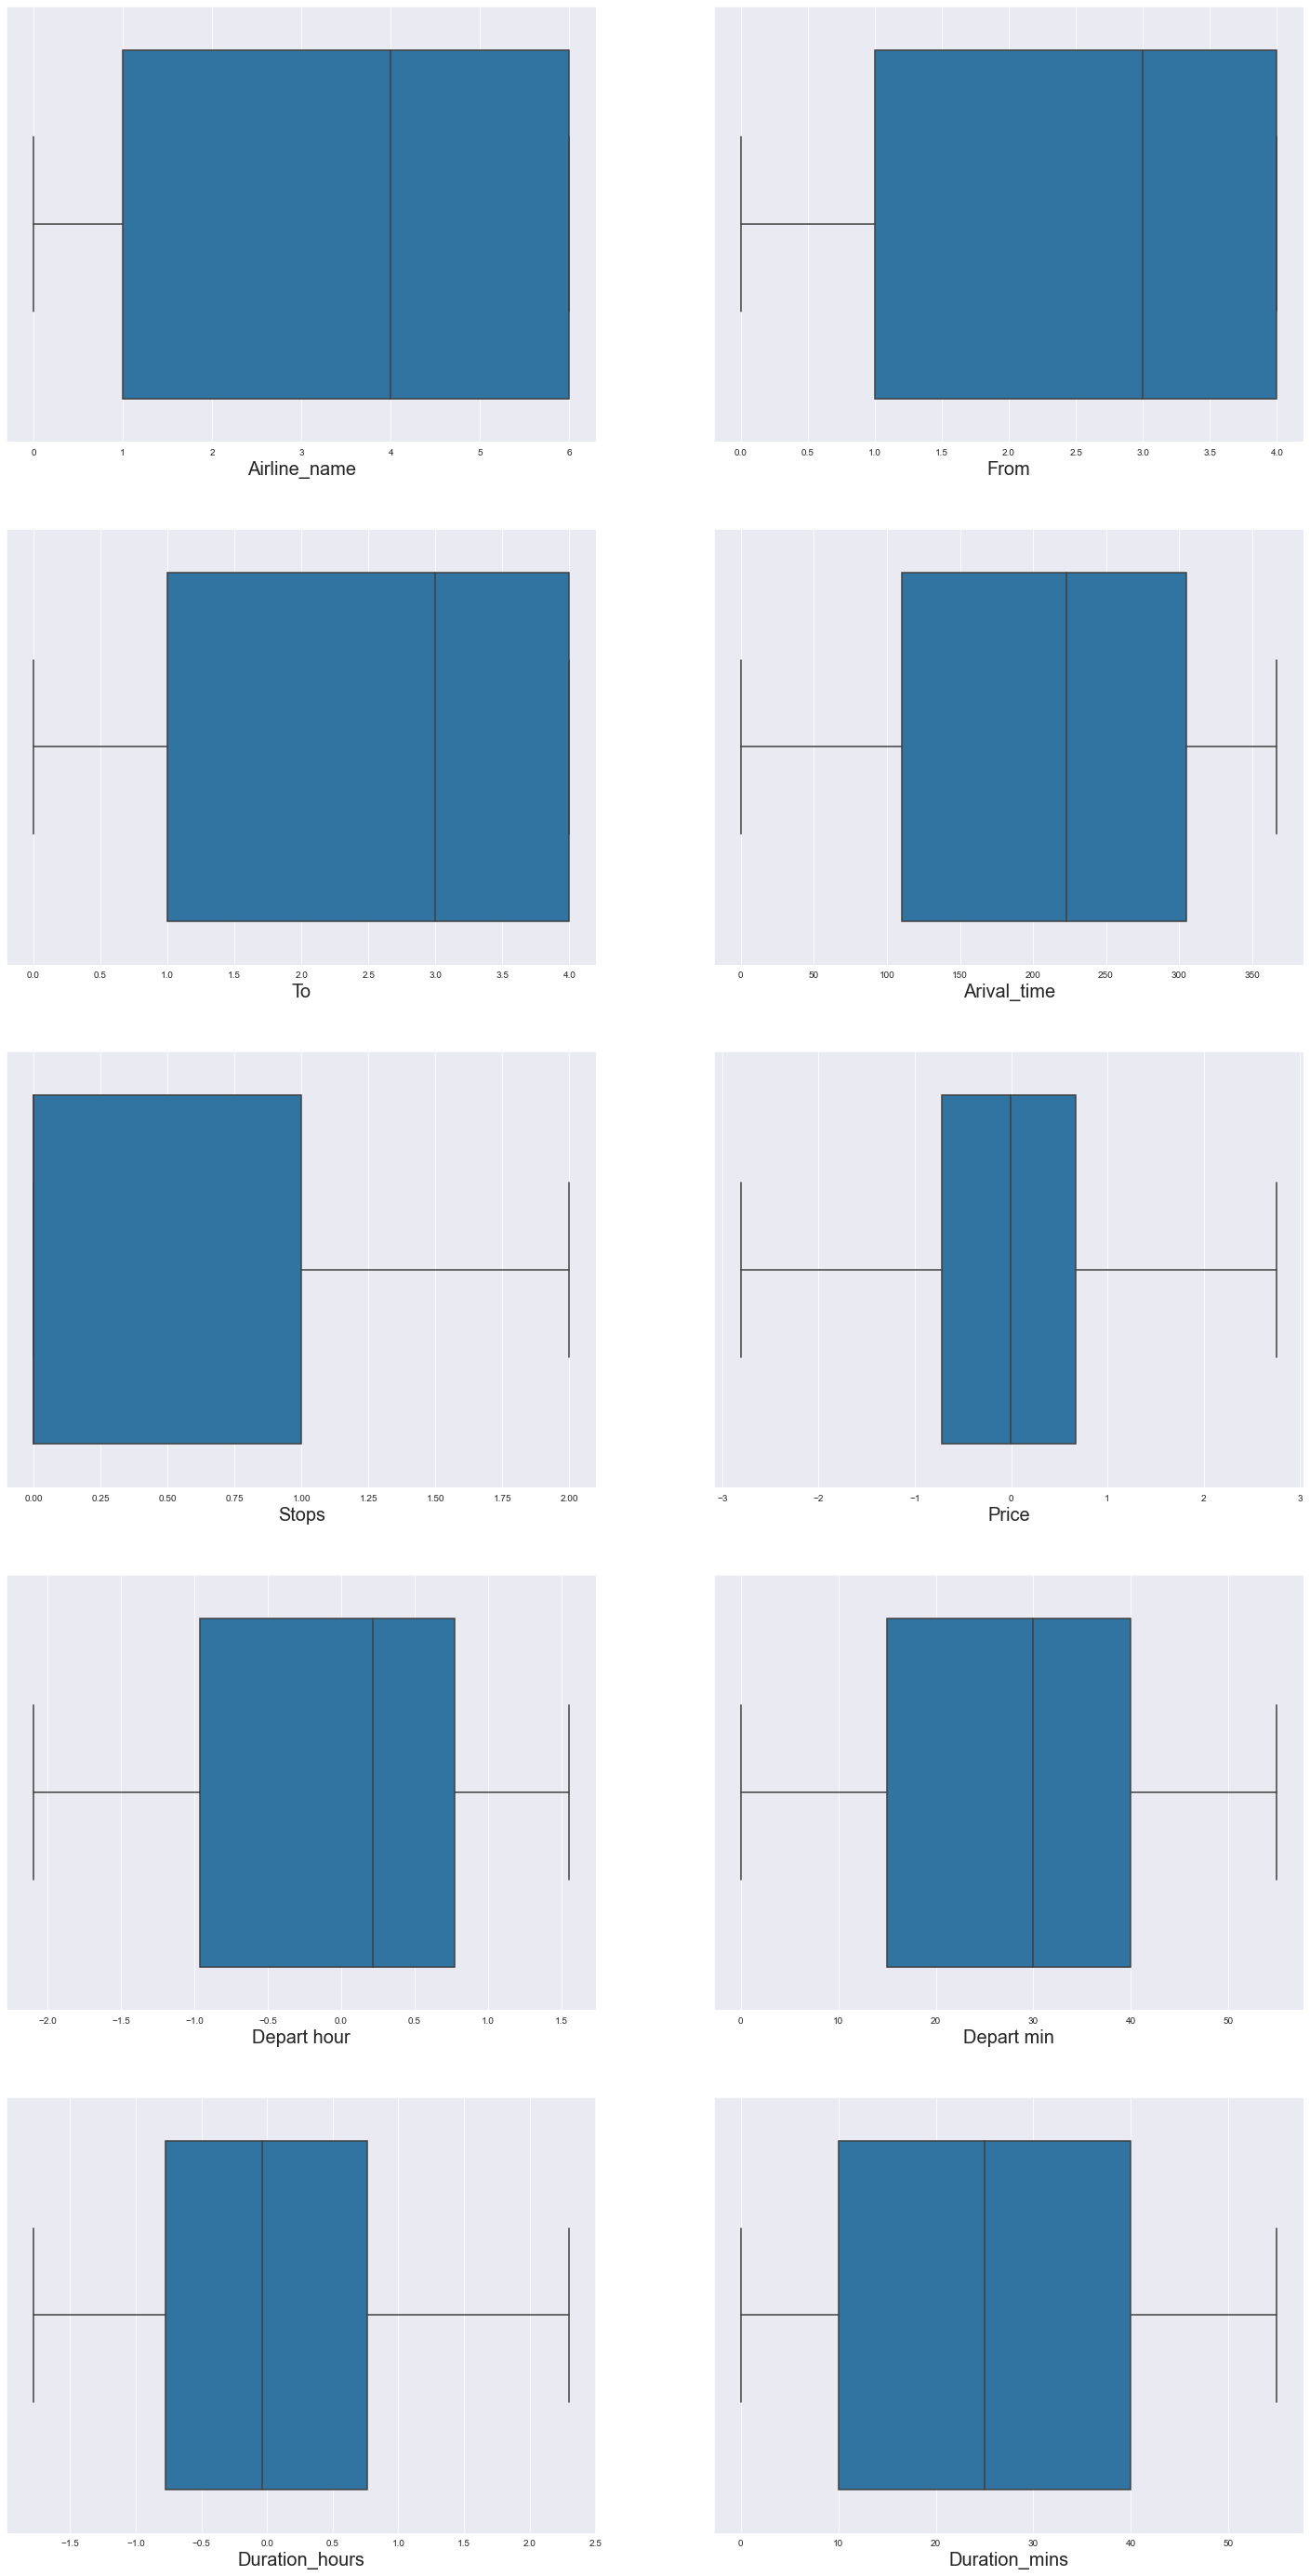

In [68]:
plt.figure(figsize=(25,50))
plotnumber=1
for column in df1:
    if plotnumber <=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.boxplot(df1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

## outliers removed

# Heatmap

In [69]:
# Checking the correlation between features and the target
cor = df1.corr()
cor

,Airline_name,From,To,Arival_time,Stops,Price,Depart hour,Depart min,Duration_hours,Duration_mins
Airline_name,1.000000,0.000048,0.014409,0.109776,-0.002100,0.259712,0.124714,0.188606,0.014563,-0.010949
From,0.000048,1.000000,-0.615891,-0.003407,-0.003096,-0.120409,0.084763,-0.071409,-0.050059,0.023887
To,0.014409,-0.615891,1.000000,0.010467,0.005996,0.080950,-0.067583,0.032619,-0.018129,-0.058812
Arival_time,0.109776,-0.003407,0.010467,1.000000,0.013580,0.150159,-0.067196,0.003942,0.044804,0.013302
Stops,-0.002100,-0.003096,0.005996,0.013580,1.000000,-0.403853,0.011171,-0.030322,-0.657030,-0.049168
Price,0.259712,-0.120409,0.080950,0.150159,-0.403853,1.000000,-0.066381,0.050927,0.425468,0.022272
Depart hour,0.124714,0.084763,-0.067583,-0.067196,0.011171,-0.066381,1.000000,0.010927,0.068553,-0.015768
Depart min,0.188606,-0.071409,0.032619,0.003942,-0.030322,0.050927,0.010927,1.000000,0.074375,-0.028818
Duration_hours,0.014563,-0.050059,-0.018129,0.044804,-0.657030,0.425468,0.068553,0.074375,1.000000,-0.035028
Duration_mins,-0.010949,0.023887,-0.058812,0.013302,-0.049168,0.022272,-0.015768,-0.028818,-0.035028,1.000000


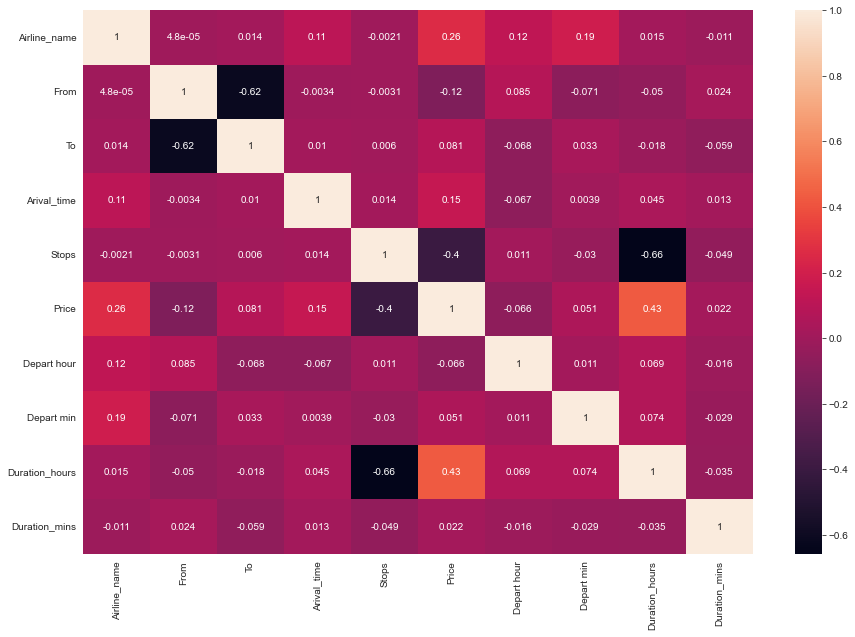

In [70]:
plt.figure(figsize = (15,10))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [71]:
cor['Price'].sort_values(ascending=False)

Price             1.000000
Duration_hours    0.425468
Airline_name      0.259712
Arival_time       0.150159
To                0.080950
Depart min        0.050927
Duration_mins     0.022272
Depart hour      -0.066381
From             -0.120409
Stops            -0.403853
Name: Price, dtype: float64

## separating the target from other features


In [72]:
X=df1.drop('Price',axis=1)#Feature
X

y=df1['Price']#Target
y

0      -1.713668
1      -1.713668
2      -1.534665
3      -1.534665
4      -1.534665
          ...   
2481    2.123503
2482    2.164651
2483    2.164651
2484    2.236695
2485    2.428380
Name: Price, Length: 2486, dtype: float64

## spliting train test data

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
y_test = np.array(y_test,dtype = float)

## scaling the data by standard scaler

In [74]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Now use VIF for checking multicollinearity problem


In [76]:
#Lets import VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_train,i)for i in range(X_train.shape[1])]
vif['feature']=X.columns

In [77]:
vif

,vif,feature
0,1.062362,Airline_name
1,1.650996,From
2,1.638812,To
3,1.029288,Arival_time
4,1.787449,Stops
5,1.044561,Depart hour
6,1.047826,Depart min
7,1.822229,Duration_hours
8,1.019550,Duration_mins


In [78]:
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    r2=r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1-r2)*(len(y_true)-1)/(len(y_true)-X_test.shape[1]-1)

    print('Explained_variance: ', round(explained_variance,4))    
    print('R2: ', round(r2,4))
    print('Adjusted_r2: ', round(adjusted_r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [79]:
from sklearn.model_selection import cross_val_score
def model_accuracy(model,X_train=X_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [80]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# ML Model

## 1.LinearRegression

Explained_variance:  0.3417
R2:  0.3388
Adjusted_r2:  0.3291
MAE:  0.6821
MSE:  0.7266
RMSE:  0.8524
Accuracy: 28.56 %
Standard Deviation: 2.21 %


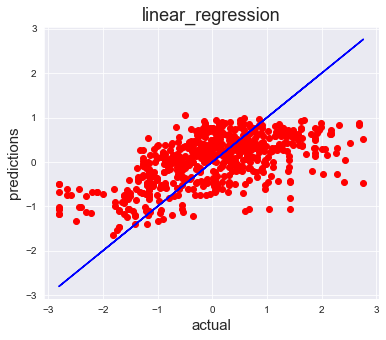

In [81]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
regression_results(y_test,y_pred)
model_accuracy(regressor)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('linear_regression', fontsize = 18)
plt.show()

## 2. RandomForestRegressor


Explained_variance:  0.541
R2:  0.54
Adjusted_r2:  0.5332
MAE:  0.5388
MSE:  0.5055
RMSE:  0.711
Accuracy: 48.93 %
Standard Deviation: 5.37 %


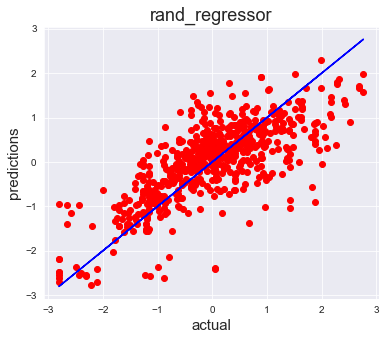

In [83]:
rand_regressor = RandomForestRegressor()
rand_regressor.fit(X_train, y_train)
y_pred_rf = rand_regressor.predict(X_test)
regression_results(y_test,y_pred_rf)
model_accuracy(rand_regressor)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_rf, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('rand_regressor', fontsize = 18)
plt.show()

## 3. DecisionTreeRegressor

Explained_variance:  0.3132
R2:  0.3118
Adjusted_r2:  0.3017
MAE:  0.6223
MSE:  0.7562
RMSE:  0.8696
Accuracy: 22.91 %
Standard Deviation: 7.41 %


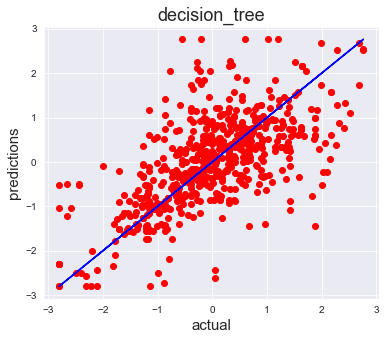

In [84]:
from sklearn.tree import DecisionTreeRegressor

decision_tree=DecisionTreeRegressor(criterion='mse',splitter='random',random_state=10)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
regression_results(y_test,y_pred_dt)
model_accuracy(decision_tree)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_dt, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('decision_tree', fontsize = 18)
plt.show()


## 4.SVR

Explained_variance:  0.4422
R2:  0.438
Adjusted_r2:  0.4298
MAE:  0.6064
MSE:  0.6176
RMSE:  0.7858
Accuracy: 39.31 %
Standard Deviation: 3.86 %


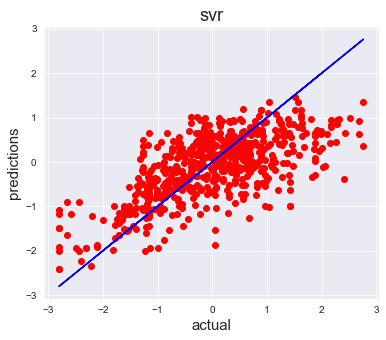

In [85]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

regression_results(y_test,y_pred_svr)
model_accuracy(svr)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_svr, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('svr', fontsize = 18)
plt.show()

## 5.KNeighborsRegressor

Explained_variance:  0.4168
R2:  0.4167
Adjusted_r2:  0.4082
MAE:  0.6043
MSE:  0.6409
RMSE:  0.8006
Accuracy: 26.51 %
Standard Deviation: 4.04 %


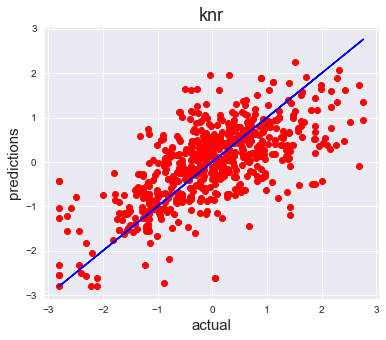

In [86]:
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train, y_train)
y_pred_knr = knr.predict(X_test)

regression_results(y_test,y_pred_knr)
model_accuracy(knr)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_knr, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('knr', fontsize = 18)
plt.show()

## 6. XGBRegressor


Explained_variance:  0.4867
R2:  0.4856
Adjusted_r2:  0.4781
MAE:  0.5607
MSE:  0.5652
RMSE:  0.7518
Accuracy: 44.14 %
Standard Deviation: 5.83 %


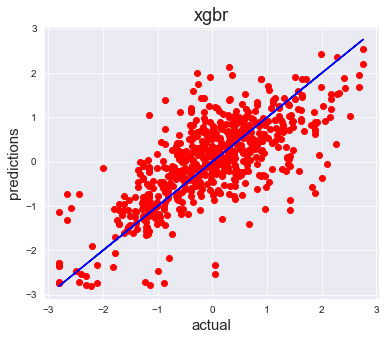

In [87]:
from xgboost import XGBRegressor
xgbr=XGBRegressor(random_state=10)
xgbr.fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)

regression_results(y_test,y_pred_xgbr)
model_accuracy(xgbr)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_xgbr, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('xgbr', fontsize = 18)
plt.show()

## 7.Lasso

Explained_variance:  0.0
R2:  -0.0032
Adjusted_r2:  -0.0179
MAE:  0.8253
MSE:  1.1024
RMSE:  1.05
Accuracy: -0.31 %
Standard Deviation: 0.30 %


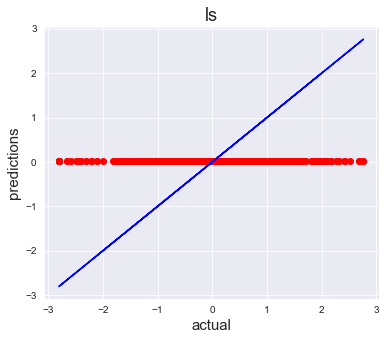

In [88]:
ls = Lasso()
ls=Lasso(random_state=10)
ls.fit(X_train, y_train)
y_pred_ls = ls.predict(X_test)

regression_results(y_test,y_pred_ls)
model_accuracy(ls)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_ls, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('ls', fontsize = 18)
plt.show()

## 8. Ridge

Explained_variance:  0.3417
R2:  0.3388
Adjusted_r2:  0.329
MAE:  0.6821
MSE:  0.7266
RMSE:  0.8524
Accuracy: 28.56 %
Standard Deviation: 2.21 %


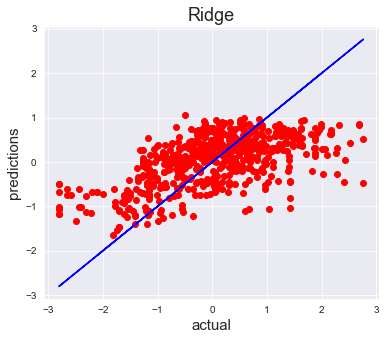

In [89]:
rd = Ridge()
rd=Ridge(random_state=10)
rd.fit(X_train, y_train)
y_pred_rd = rd.predict(X_test)

regression_results(y_test,y_pred_rd)
model_accuracy(rd)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_rd, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('Ridge', fontsize = 18)
plt.show()

## 9. AdaBoostRegressor

Explained_variance:  0.4898
R2:  0.4565
Adjusted_r2:  0.4485
MAE:  0.6465
MSE:  0.5972
RMSE:  0.7728
Accuracy: 37.63 %
Standard Deviation: 2.91 %


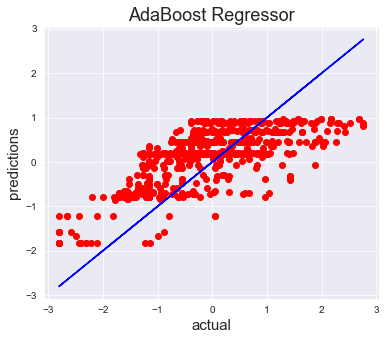

In [91]:
abr = AdaBoostRegressor()
abr=AdaBoostRegressor(random_state=10)
abr.fit(X_train, y_train)
y_pred_abr = abr.predict(X_test)

regression_results(y_test,y_pred_abr)
model_accuracy(abr)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_abr, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('AdaBoost Regressor', fontsize = 18)
plt.show()

## 10. GradientBoostingRegressor


Explained_variance:  0.5799
R2:  0.5793
Adjusted_r2:  0.5732
MAE:  0.5379
MSE:  0.4623
RMSE:  0.6799
Accuracy: 52.63 %
Standard Deviation: 3.00 %


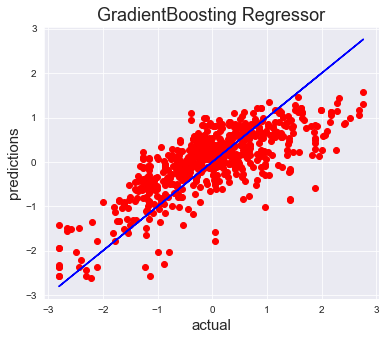

In [92]:
gbr = GradientBoostingRegressor()
gbr=GradientBoostingRegressor(random_state=10)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

regression_results(y_test,y_pred_gbr)
model_accuracy(gbr)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_gbr, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('GradientBoosting Regressor', fontsize = 18)
plt.show()

## Hyperparameter tuning using GridsearchCV ,RandomizedSearchCV

In [93]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [94]:
param = {
             'min_samples_split':[2,5,10],
             'min_samples_leaf':[1,3,4],
             'max_depth':[5,10,15],
             'learning_rate': [0.1,0.2,0.3],
              'n_estimators':[150,200,250],
             }

In [95]:
grd = GridSearchCV(gbr,param_grid = param)
grd.fit(X_train,y_train)

print('Best Params ',grd.best_params_)

Best Params  {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}


Explained_variance:  0.5728
R2:  0.5724
Adjusted_r2:  0.5661
MAE:  0.5256
MSE:  0.4699
RMSE:  0.6855
Accuracy: 52.03 %
Standard Deviation: 4.22 %


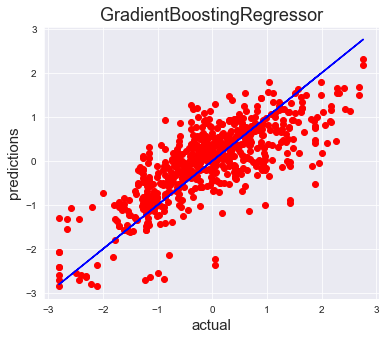

In [96]:
gbr= GradientBoostingRegressor(learning_rate=0.1, n_estimators=150, min_samples_split=10, min_samples_leaf=4, max_depth=5)
gbr.fit(X_train, y_train)
y_pred =gbr.predict(X_test)

regression_results(y_test,y_pred)
model_accuracy(gbr)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('GradientBoostingRegressor', fontsize = 18)
plt.show()

# Lets Save Our Model

In [97]:
import pickle
filename='Flight_Price_Prediction_Project'
pickle.dump(gbr,open(filename,'wb'))

# Conclusion

In [98]:
loaded_model=pickle.load(open('Flight_Price_Prediction_Project','rb'))
result=loaded_model.score(X_test,y_test)
print(result*100)

57.239916271683676
